In [1]:
# Import all required libraries
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Load data
news_data2 = pd.read_csv('sentiment_news_data.csv')

In [3]:
# for empty strings replace with NaN
news_data2 = news_data2.fillna('')

In [4]:
# Extract dates, headlines, and sentiments
all_entries = []
for i in range(1, 26):  # Columns: Top1 to Top25
    col = f'Top{i}'
    col2 = f'Sen_Top{i}'
    for j in range(len(news_data2[col])):
        all_entries.append([news_data2['Date'][j], news_data2[col][j], news_data2[col2][j]])

print(f'{all_entries[:2]}')
print(f'\n{all_entries[1859]}')

[['1-May-18', 'north korea open sky south korean medium report', 0.0], ['2-May-18', 'got fear trump threatens declassify fbi justice department file surveillance abuse clinton email probe doj slow release congress', -0.3]]

['1-May-18', 'mueller probe aint ending anytime soon', 0.0]


In [5]:
# Convert into DataFrame
database = pd.DataFrame(data={
    'Date': [row[0] for row in all_entries],
    'News_Headlines': [row[1] for row in all_entries],
    'Sentiment': [row[2] for row in all_entries]
})

In [6]:
# TFIDF Vectorizer
# norm='l2': Normalizes results of TF-IDF vectors using L2 normalization 
# scales vectors so that their Euclidean (L2) norm is 1
# beneficial when using cosine similarity
# other options not necessary for TfidfVectorizer since the data has already been token normalized
vectorizer = TfidfVectorizer(norm='l2')
newsValues = database['News_Headlines'].values
mtx = vectorizer.fit_transform(newsValues)
mtx.shape

(46475, 35975)

In [7]:
# Vector search using cosine similarity
def vector_search(query, vectorizer, mtx, database, k=5):
    temp = cosine_similarity(mtx, vectorizer.transform([query])).flatten()
    new = temp.argsort()[-k:][::-1]

    results = []
    for i in new:
        date = database.iloc[i]['Date']
        headline = database.iloc[i]['News_Headlines']
        sentiment = database.iloc[i]['Sentiment']
        score = temp[i]
        results.append((i, date, headline, score, sentiment))

    print(f'\n*** Results for: "{query}" ***')
    for result in results:
        print(f'Similarity Score: {result[3]:.4f}| Date: {result[1]} | {result[2]} | Sentiment value: {result[4]:.1f} | Index: {result[0]}')

    return results

In [8]:
# Example Usage for multiple queries
queries = ['China Bought Russia', 'America', 'Trump', 'electric']

# Loop through each query and get the results
for query in queries:
    results = vector_search(query, vectorizer, mtx, database, k=10)


*** Results for: "China Bought Russia" ***
Similarity Score: 0.5682| Date: 1-May-22 | serbia showcase artillery bought russia china | Sentiment value: 0.0 | Index: 5212
Similarity Score: 0.5341| Date: 6-Jan-20 | china bought russia s400 missile taiwan need sam | Sentiment value: 0.0 | Index: 43374
Similarity Score: 0.3776| Date: 25-Apr-22 | official elon musk bought twitter 44 billion | Sentiment value: 0.0 | Index: 18219
Similarity Score: 0.3683| Date: 10-Feb-22 | china bought none 200 billion promised u phase 1 trade deal study reveals | Sentiment value: 0.0 | Index: 27440
Similarity Score: 0.3497| Date: 23-Sep-18 | man dy boat bought capsizes journey home | Sentiment value: 0.0 | Index: 33609
Similarity Score: 0.3411| Date: 12-Sep-18 | russia china trust | Sentiment value: 0.0 | Index: 5713
Similarity Score: 0.3384| Date: 31-Mar-22 | india bought russian oil discount 35 per barrel | Sentiment value: 0.0 | Index: 46079
Similarity Score: 0.2928| Date: 5-Jun-21 | investor bought block

In [ ]:
# import for plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

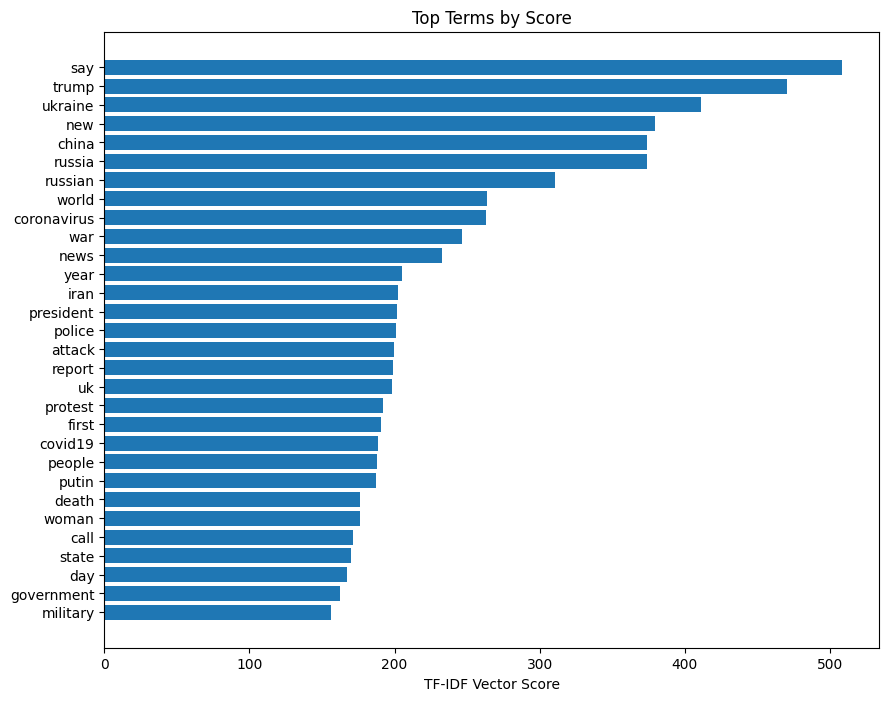

In [ ]:
# get names from vector
names = vectorizer.get_feature_names_out()
# get sum of score for the terms
# the score indicates the importances in the document
sums = np.asarray(mtx.sum(axis=0)).flatten()
tops = np.argsort(sums)[-30:]
terms    = [names[i] for i in tops]
scores   = [sums[i]  for i in tops]

# plot the bar graph
plt.figure(figsize=(10, 8))
plt.barh(terms, scores)
plt.xlabel('TF-IDF Vector Score')
plt.title('Top Terms by Score')
plt.show()


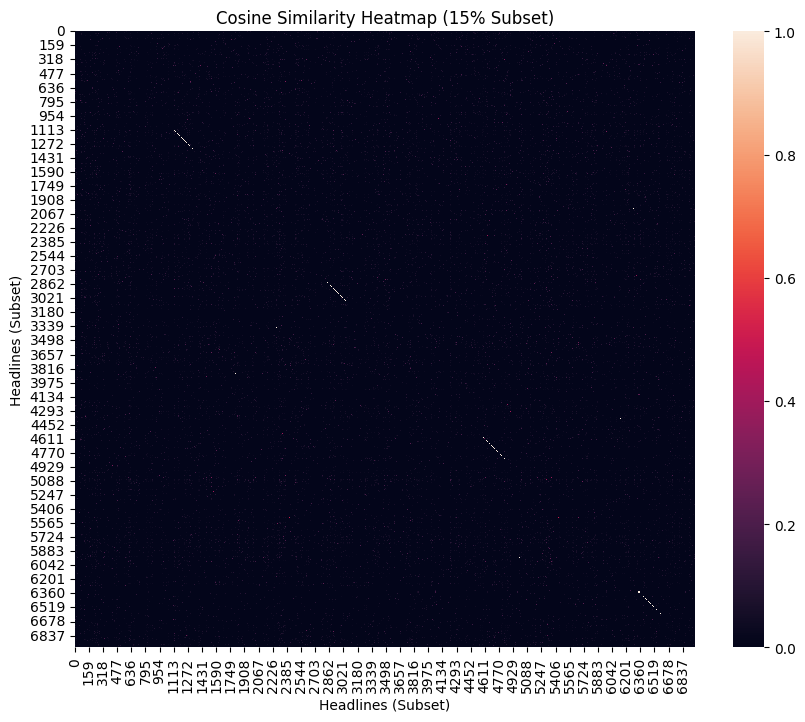

In [ ]:
# reduce dataset to a 15% sample due to memory constraints
red_per = .15
# convert to int
sub_size = int(red_per * mtx.shape[0])
# select a randomly for the lower percentages
sub_idx = np.random.choice(mtx.shape[0], sub_size)
subset = mtx[sub_idx]
# calculate the cosine similiary on subset
sub_mat = cosine_similarity(subset)

# plot heatmap for subset
plt.figure(figsize=(10, 8))
sns.heatmap(sub_mat)
plt.title('Cosine Similarity Heatmap (15% Subset)')
plt.xlabel('Headlines (Subset)')
plt.ylabel('Headlines (Subset)')
plt.show()


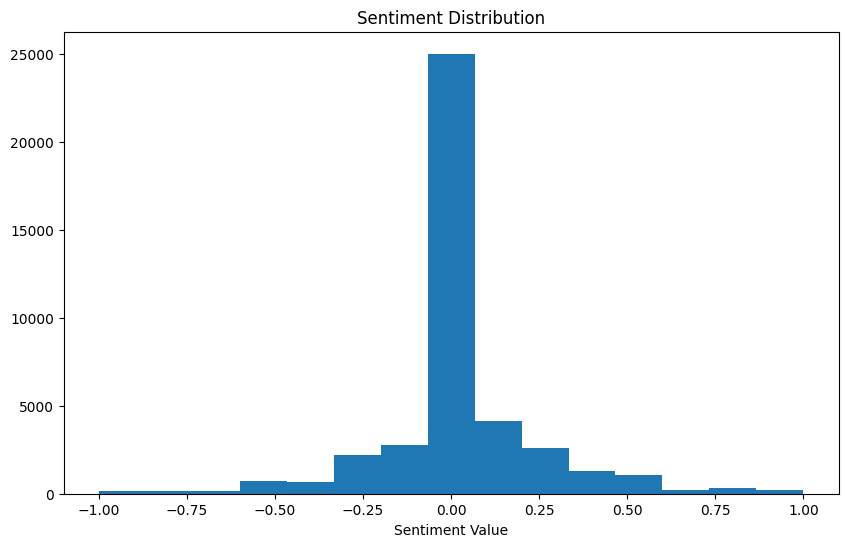

In [33]:
# get the sentiment values and remove empty
sens = database['Sentiment'].values
sens2 = [i for i in sens if i != '']
# convert values to float
sens3 = [float(s) for s in sens2]

# plot the graph for sentiment distribution
plt.figure(figsize=(10, 6))
plt.hist(sens3, bins=15)
plt.xlabel('Sentiment Value')
plt.title('Sentiment Distribution')
plt.show()
